In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Choose one variable and plot it four different ways
Lap times for the 2008 Brazilian Grand Prix

In [2]:
#set dataframes
races = pd.read_csv('races.csv')
lap_times = pd.read_csv('lapTimes.csv')
drivers = pd.read_csv('drivers.csv', encoding = 'ISO-8859-1')

#get race id for brazil 2008
brazilian_gp_2008_id = races.loc[races['date'] == '2008-11-02'] #use the date from wikipedia to find the race
brazilian_gp_2008 = lap_times.loc[lap_times['raceId'] == 35]

#lap_times.head()
#brazilian_gp_2008_id
brazilian_gp_2008.head()

,raceId,driverId,lap,position,time,milliseconds
341615,35,8,1,3,1:44.672,104672
341616,35,8,2,3,2:10.763,130763
341617,35,8,3,3,2:01.605,121605
341618,35,8,4,3,1:59.134,119134
341619,35,8,5,3,1:20.310,80310


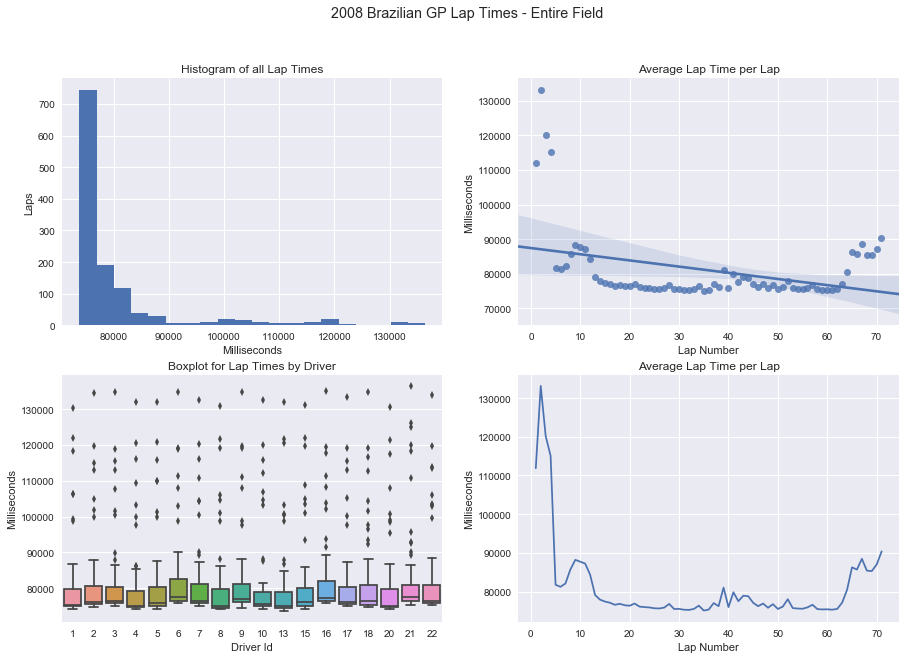

In [15]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (15,10))
plt.suptitle('2008 Brazilian GP Lap Times - Entire Field')
#define a variable to hold average lap times per lap
brazilian_gp_2008_lapavg = brazilian_gp_2008.groupby('lap', as_index = False)['milliseconds'].mean()

plt.subplot(2,2,1)
plt.hist(brazilian_gp_2008['milliseconds'], bins = 20)
plt.title('Histogram of all Lap Times')
plt.xlabel('Milliseconds')
plt.ylabel('Laps')

plt.subplot(2,2,2)
sns.regplot(x = 'lap', y = 'milliseconds', data = brazilian_gp_2008_lapavg)
plt.title('Average Lap Time per Lap')
plt.ylabel('Milliseconds')
plt.xlabel('Lap Number')

#make this one pretty
plt.subplot(2,2,3)
sns.boxplot(x = 'driverId', y = 'milliseconds', data = brazilian_gp_2008)
plt.title('Boxplot for Lap Times by Driver')
plt.ylabel('Milliseconds')
plt.xlabel('Driver Id')

plt.subplot(2,2,4)
plt.plot(brazilian_gp_2008_lapavg['lap'], brazilian_gp_2008_lapavg['milliseconds'])
plt.title('Average Lap Time per Lap')
plt.xlabel('Lap Number')
plt.ylabel('Milliseconds')

## Choose two continuous variables and plot them three different ways

Plot Felipe Massa's & Lewis Hamilton's lap times for the 2008 Brazilian Grand Prix: https://en.wikipedia.org/wiki/2008_Brazilian_Grand_Prix

In [4]:
brazilian_gp_2008_id = races.loc[races['date'] == '2008-11-02'] #use the date from wikipedia to find the race
brazilian_gp_2008_id

,raceId,year,round,circuitId,name,date,time,url
34,35,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00,http://en.wikipedia.org/wiki/2008_Brazilian_Gr...


In [5]:
#find drivers
massa_info = drivers.loc[drivers['driverRef'] == 'massa']
hamilton_info = drivers.loc[drivers['driverRef'] == 'hamilton']
#massa_info
#hamilton_info

In [6]:
massa = brazilian_gp_2008.loc[brazilian_gp_2008['driverId'] == 13]
hamilton = brazilian_gp_2008.loc[brazilian_gp_2008['driverId'] == 1]

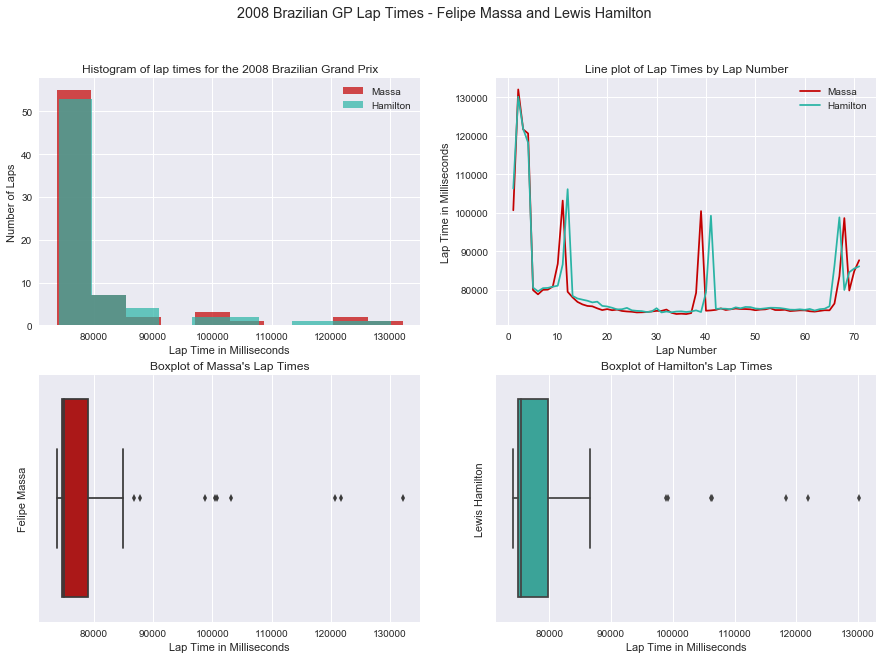

In [16]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (15,10))
plt.suptitle('2008 Brazilian GP Lap Times - Felipe Massa and Lewis Hamilton')

plt.subplot(2,2,1)
plt.hist(massa['milliseconds'], color = '#C30000', alpha = 0.7, label = 'Massa')
plt.hist(hamilton['milliseconds'], color = '#2AB4A5', alpha = 0.7, label = 'Hamilton')
plt.title('Histogram of lap times for the 2008 Brazilian Grand Prix')
plt.ylabel('Number of Laps')
plt.xlabel('Lap Time in Milliseconds')
plt.legend()

plt.subplot(2,2,2)
plt.plot(massa['lap'], massa['milliseconds'], color = '#C30000', label = 'Massa')
plt.plot(hamilton['lap'], hamilton['milliseconds'], color = '#2AB4A5', label = 'Hamilton')
plt.title('Line plot of Lap Times by Lap Number')
plt.ylabel('Lap Time in Milliseconds')
plt.xlabel('Lap Number')
plt.legend()

plt.subplot(2,2,3)
sns.boxplot(x = massa['milliseconds'], color = '#C30000')
plt.title('Boxplot of Massa\'s Lap Times')
plt.xlabel('Lap Time in Milliseconds')
plt.ylabel('Felipe Massa')

plt.subplot(2,2,4)
sns.boxplot(x = hamilton['milliseconds'], color = '#2AB4A5')
plt.title('Boxplot of Hamilton\'s Lap Times')
plt.xlabel('Lap Time in Milliseconds')
plt.ylabel('Lewis Hamilton')

## Choose one continuous variables and one categorical variable and plot them six different ways
Categorical: Plot Felipe Massa & Lewis Hamilton's race position for the 2008 Brazilian Grand Prix

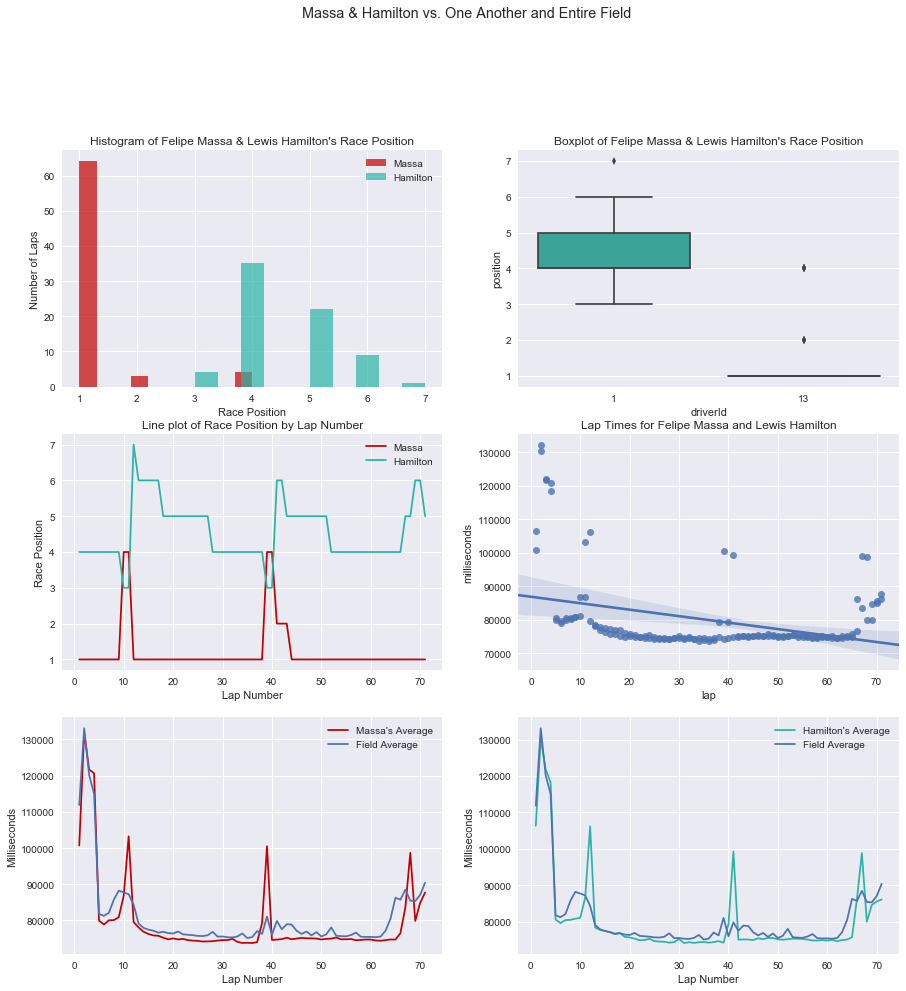

In [20]:
massa_hamilton = pd.concat([massa, hamilton]) #concatenate data so sns can use it

sns.set(style = 'darkgrid')
plt.figure(figsize = (15,20))
plt.suptitle('Massa & Hamilton vs. One Another and Entire Field')

plt.subplot(4,2,1)
plt.hist(massa['position'], color = '#C30000', alpha = 0.7, label = 'Massa')
plt.hist(hamilton['position'], color = '#2AB4A5', alpha = 0.7, label = 'Hamilton')
plt.title('Histogram of Felipe Massa & Lewis Hamilton\'s Race Position')
plt.ylabel('Number of Laps')
plt.xlabel('Race Position')
plt.legend()

plt.subplot(4,2,2)
sns.boxplot(x = 'driverId', y = 'position', data = massa_hamilton, color = '#2AB4A5')
plt.title('Boxplot of Felipe Massa & Lewis Hamilton\'s Race Position')

plt.subplot(4,2,3)
plt.plot(massa['lap'], massa['position'], color = '#C30000', label = 'Massa')
plt.plot(hamilton['lap'], hamilton['position'], color = '#2AB4A5', label = 'Hamilton')
plt.title('Line plot of Race Position by Lap Number')
plt.ylabel('Race Position')
plt.xlabel('Lap Number')
plt.legend()

#Make this one pretty
plt.subplot(4,2,4)
sns.regplot(x = 'lap', y = 'milliseconds', data = massa_hamilton) #make these colors pretty
plt.title('Lap Times for Felipe Massa and Lewis Hamilton')

plt.subplot(4,2,5)
plt.plot(massa['lap'], massa['milliseconds'], color = '#C30000', label = 'Massa\'s Average')
plt.plot(brazilian_gp_2008_lapavg['lap'], brazilian_gp_2008_lapavg['milliseconds'], label = 'Field Average')
plt.legend()
plt.xlabel('Lap Number')
plt.ylabel('Milliseconds')

plt.subplot(4,2,6)
plt.plot(hamilton['lap'], hamilton['milliseconds'], color = '#2AB4A5', label = 'Hamilton\'s Average')
plt.plot(brazilian_gp_2008_lapavg['lap'], brazilian_gp_2008_lapavg['milliseconds'], label = 'Field Average')
plt.legend()
plt.xlabel('Lap Number')
plt.ylabel('Milliseconds')

In [9]:
#brazilian_gp_2008 = drivers.set_index('driverId').join(brazilian_gp_2008, on = 'driverId', lsuffix = 'brazil', rsuffix = 'driver')
#brazilian_gp_2008 = brazilian_gp_2008.set_index('driverId').join(driver)
#massa2 = brazilian_gp_2008.iloc[brazilian_gp_2008['driverId'] == 13]
#massa2

In [10]:
#massa2 = brazilian_gp_2008[brazilian_gp_2008['driverId'] == 13]
#massa2

In [11]:
#brazilian_gp_2008['driverRef'] == 'massa'

In [12]:
#drivers.head()